本题针对房产交易双方，利用真实成交数据，从房地产交易维度对交易参与人进行评价，计算个人房产信用评分。

**字段说明**：
- USER_ID：购房人ID
- Age：	年龄
- Sex：	性别
- TEL_ID：	电话归属地
- Province：	省份
- NATIONALITY：	国籍
- HOU_ID：	房屋编号
- Property_ID：	房屋属性 0：存量房、1：商品房、
- Property_Usage_Type：	房屋用途
- Property_Architectural_Area：	建筑面积
- Property_Sign_Date：	网签时间
- Property_Record_Date：	备案时间
- Property_Price：	房屋成交总价
- Property_Loan_Way：	贷款方式
- Property_Payment：	付款方式
- CFCS	查封次数：
- JFCS	解封次数：
- Purchase_houcs：	历史买房次数
- Sale_houcs：	历史卖房次数
- Mortgage_starttime：	抵押开始时间
- Mortgage_endtime：	抵押结束时间


## 1 加载数据

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
pd.set_option('display.max_columns',100)

In [3]:
data=pd.read_csv('data/credit_pri_data.csv')
data.shape

(117919, 21)

In [4]:
data.head()

,USER_ID,AGE,SEX,TEL_ID,PROVINCE,NATIONALITY,HOU_ID,PROPERTY_ID,PROPERTY_USAGE_TYPE,PROPERTY_ARCHITECTURAL_AREA,PROPERTY_SIGN_DATE,PROPERTY_RECORD_DATE,PROPERTY_PRICE,PROPERTY_LOAN_WAY,PROPERTY_PAYMENT,CFCS,JFCS,Mortgage_starttime,Mortgage_endtime,Purchase_houcs,Sale_houcs
0,553081,2.0,0.0,0,33,1,110699851,1,1,0,2018/04,2018/04,0,3,3,NaN,NaN,NaN,NaN,2.0,1.0
1,620729,2.0,1.0,0,33,1,110699851,1,1,0,2018/04,2018/04,0,3,3,NaN,NaN,NaN,NaN,2.0,1.0
2,473511,4.0,0.0,0,61,1,110805321,1,1,2,2018/04,2018/04,3,5,2,NaN,NaN,NaN,NaN,2.0,NaN
3,700187,4.0,1.0,0,33,1,110805321,1,1,2,2018/04,2018/04,3,5,2,NaN,NaN,NaN,NaN,1.0,1.0
4,172276,4.0,0.0,0,33,1,110165121,1,1,0,2018/03,2018/03,1,5,1,NaN,NaN,NaN,NaN,1.0,NaN


统计每个字段空值个数

In [6]:
data.isnull().sum()

USER_ID                             0
AGE                                68
SEX                             24745
TEL_ID                              0
PROVINCE                            0
NATIONALITY                         0
HOU_ID                              0
PROPERTY_ID                         0
PROPERTY_USAGE_TYPE                 0
PROPERTY_ARCHITECTURAL_AREA         0
PROPERTY_SIGN_DATE                  0
PROPERTY_RECORD_DATE                0
PROPERTY_PRICE                      0
PROPERTY_LOAN_WAY                   0
PROPERTY_PAYMENT                    0
CFCS                           117634
JFCS                           117649
Mortgage_starttime             110682
Mortgage_endtime               110682
Purchase_houcs                      2
Sale_houcs                     102055
dtype: int64

In [12]:
data['AGE']=data['AGE'].fillna(2.0)

G:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


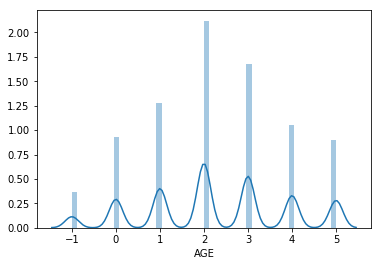

In [13]:
sns.distplot(data['AGE'])